In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("..")

In [3]:
from zca import ZCA

In [4]:
imgs = np.load("/Users/Jo/Downloads/cifar-10-batches-py/test_batch")["data"].astype(np.float32)

In [5]:
imgs = imgs.reshape(-1, 3, 32, 32)
imgs_mean = imgs.mean((0, 2, 3))[None, :, None, None]
imgs_norm = imgs - imgs_mean
imgs_norm = imgs_norm.reshape(-1, 3072)

In [6]:
zca_model = ZCA().fit(imgs_norm)

In [7]:
def show_imgs(imgs):
    n_rows = np.ceil(imgs.shape[0]**.5).astype(int)
    plt.gcf().set_size_inches(15, 15)
    for i in range(len(imgs)):
        plt.subplot(n_rows, n_rows, i + 1)
        img = np.transpose(imgs[i].reshape(3, 32, 32), (1, 2, 0))
        plt.imshow(img)
        plt.axis("off")

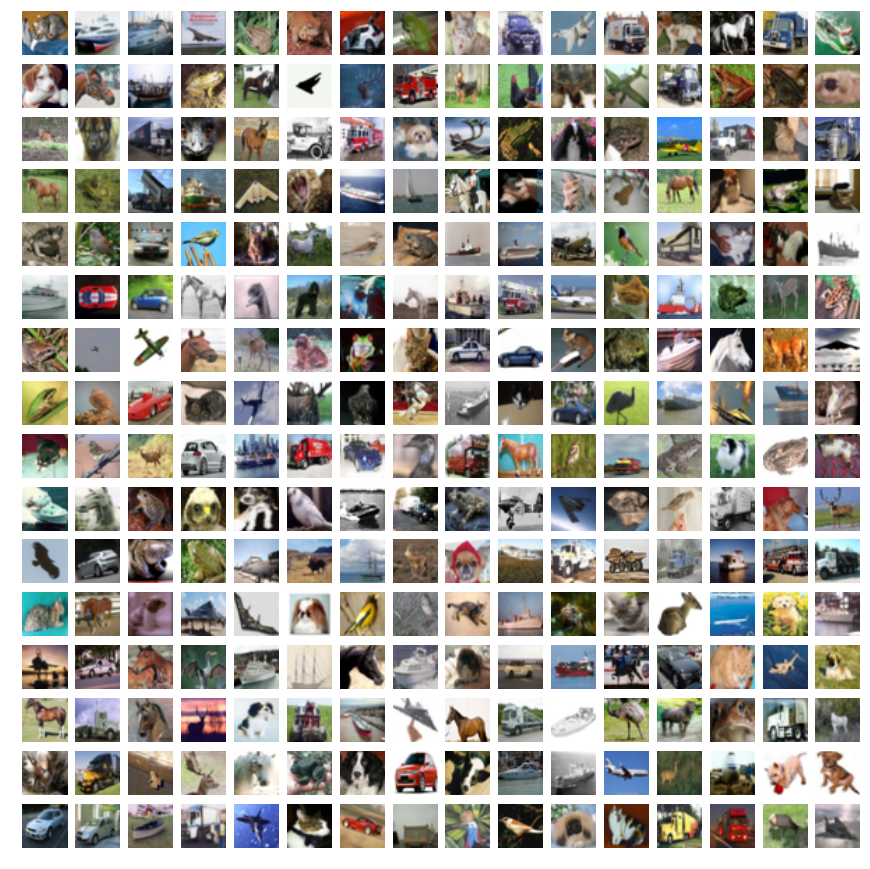

In [8]:
show_imgs(imgs[:256] / 255.)

In [9]:
z_imgs = zca_model.transform(imgs_norm[:256], 1e-6)

In [10]:
z_imgs.min(), z_imgs.max()

(-13.366349390472235, 16.68929571861878)

In [11]:
# recale to [0, 1] only for vizualization purpose
z_imgs_scaled = z_imgs - z_imgs.min(0)
z_imgs_scaled /= z_imgs_scaled.max(0)
print(z_imgs_scaled.min(), z_imgs_scaled.max())

(0.0, 1.0)


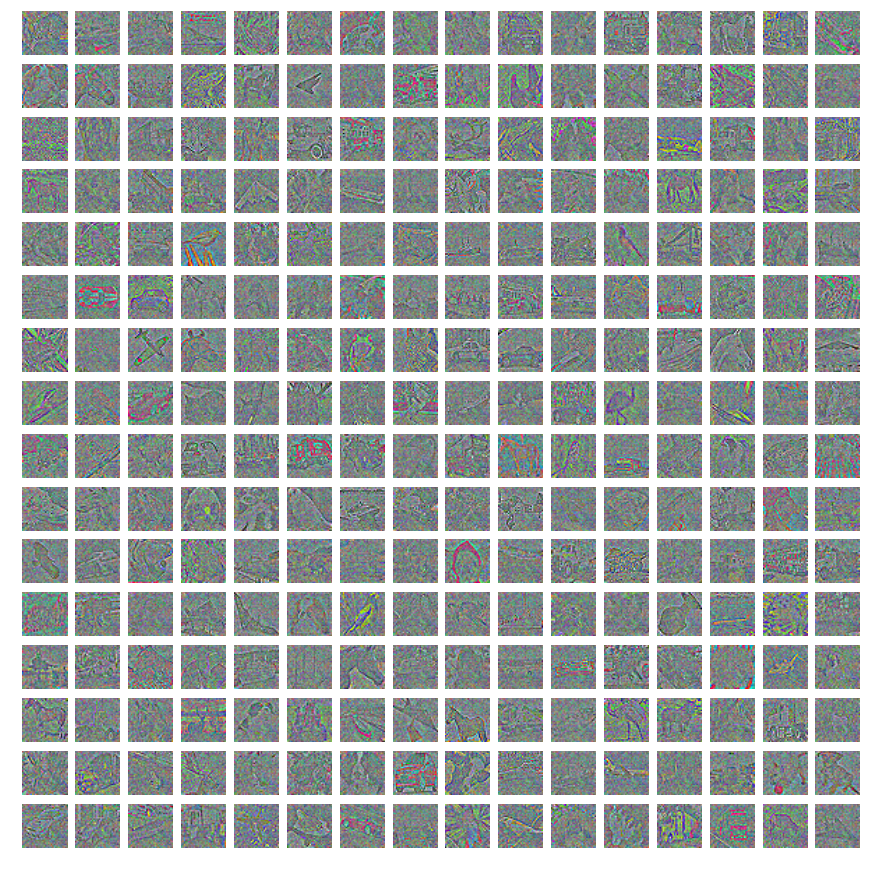

In [12]:
show_imgs(z_imgs_scaled)